### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from sklearn.metrics import f1_score
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset
from evaluate_utils import evaluate_model_cm, evaluate_model_score

### Load necessary data

In [2]:
# specify results directory
results_dir = pathlib.Path("evaluations/")
results_dir.mkdir(parents=True, exist_ok=True)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate best model

In [3]:
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Evaluate with training data

In [4]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
training_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,MetaphaseAlignment,572.214286,58.185714,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.048350,-0.721622,0.749788,-1.377590,0.454974,0.188488,0.141427,-1.553405,2.346107,-1.774278
1,Artefact,1117.070423,342.732394,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.172767,-0.290257,-0.709041,-1.431541,-0.063308,-0.412793,0.452684,-1.906647,1.962141,-0.223039
2,Artefact,1116.500000,362.000000,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.093582,-0.323180,-0.663069,-1.427502,-0.901764,-0.355080,0.418053,-2.298449,1.098266,-0.069326
3,Artefact,1106.348485,370.469697,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,0.943948,-0.211267,-0.346355,-1.365543,-0.276932,0.023856,0.376514,-1.700348,1.833686,-0.625385
5,Prometaphase,1305.853333,656.426667,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.581095,0.635676,-0.597231,-1.204226,0.247975,0.923955,0.060671,-2.054225,1.040119,-0.528491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,OutOfFocus,383.075269,220.198925,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,ABCB8,...,0.525202,8.110262,1.777901,-1.512628,-0.225867,-1.612982,-0.679415,-2.581475,0.501395,1.981009
5519,OutOfFocus,975.747253,293.868132,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.277908,5.959773,2.362540,-1.000032,-0.723652,-1.460720,-1.919148,-0.301130,0.779582,3.084642
5520,OutOfFocus,898.614815,302.407407,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.553313,10.086836,1.170072,-1.317000,-0.994644,-1.406541,-0.104613,-0.056216,0.714624,1.612470
5521,OutOfFocus,946.758621,281.689655,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,-0.152000,11.078217,2.460915,-0.989282,-1.141723,-1.424882,-2.959780,-1.999795,0.702134,2.306039


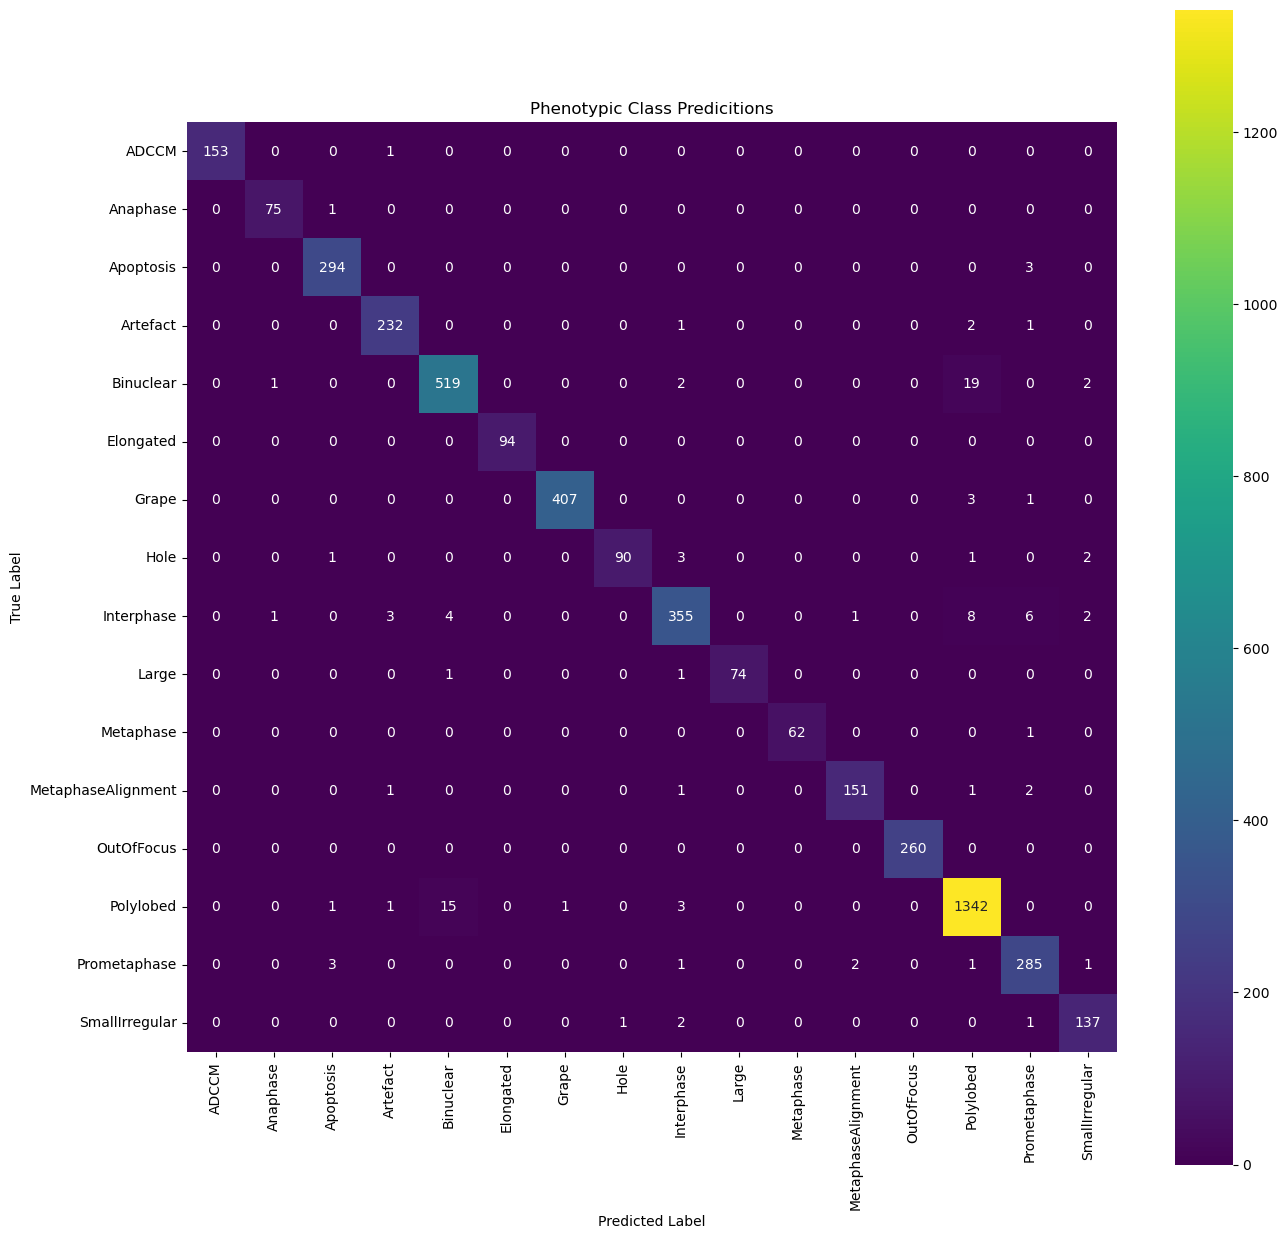

In [5]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

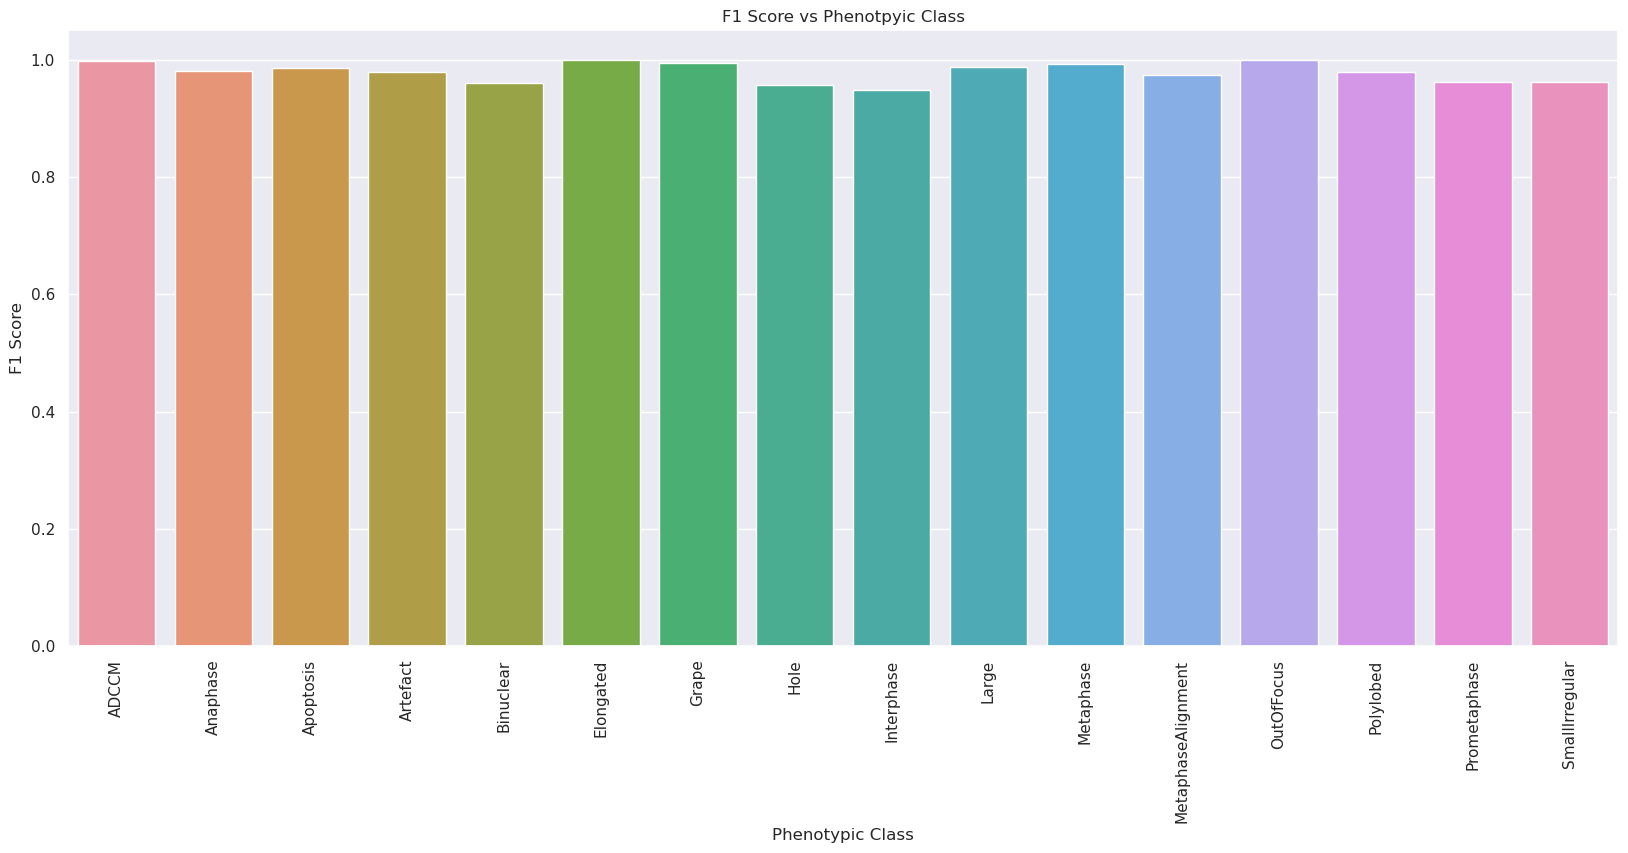

In [6]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [7]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
1785,ADCCM,1068.677419,279.193548,LT0090_33,383,84,1,LT0090_33_383,LT0090_33/LT0090_33_383_84.tif,negative control,...,0.980201,0.039851,-0.451436,-1.165703,-0.203501,1.156018,-0.036815,-0.596432,1.804187,-1.928435
4524,ADCCM,123.577778,162.055556,LT0030_17,184,36,1,LT0030_17_184,LT0030_17/LT0030_17_184_36.tif,RGR,...,1.573054,-0.689502,-0.397677,-1.633247,-1.508271,0.073302,0.576220,0.717420,1.267551,-0.627081
1045,ADCCM,1063.840909,250.295455,LT0100_03,93,37,1,LT0100_03_93,LT0100_03/LT0100_03_93_37.tif,ENSG00000148826,...,1.338929,0.761862,0.409138,-1.544310,-0.992309,0.307469,0.422180,-0.963221,1.679140,-0.485939
1046,ADCCM,1040.779412,254.014706,LT0100_03,93,37,1,LT0100_03_93,LT0100_03/LT0100_03_93_37.tif,ENSG00000148826,...,1.354294,0.372806,0.022505,-1.530314,-1.003115,0.490786,0.423160,-0.741725,2.074033,-0.048597
3474,ADCCM,793.274194,747.387097,LT0043_48,166,56,1,LT0043_48_166,LT0043_48/LT0043_48_166_56.tif,OGG1,...,0.800734,0.309147,0.141045,0.395494,-0.030743,0.434168,-1.985492,0.154680,1.475093,-0.779777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,SmallIrregular,1036.586207,903.810345,LT0015_22,69,61,1,LT0015_22_69,LT0015_22/LT0015_22_69_61.tif,ITGAV,...,1.586672,2.539746,0.270197,-1.500020,-0.020188,1.144647,0.419512,-0.683572,1.026954,0.375908
647,SmallIrregular,629.394366,487.464789,LT0094_01,319,36,1,LT0094_01_319,LT0094_01/LT0094_01_319_36.tif,ENSG00000177426,...,1.219429,-0.060851,-0.340742,-1.309259,0.304099,1.072908,0.102529,-0.070242,2.095821,-2.183013
4934,SmallIrregular,339.514286,749.114286,LT0032_01,137,49,1,LT0032_01_137,LT0032_01/LT0032_01_137_49.tif,MAP2K1IP1,...,0.647599,0.211924,-0.394152,-0.659935,0.708280,-0.094690,0.330425,0.986999,0.235111,1.444407
4895,SmallIrregular,1072.407407,953.851852,LT0015_22,69,61,1,LT0015_22_69,LT0015_22/LT0015_22_69_61.tif,ITGAV,...,1.373507,2.122640,-0.256706,-0.975324,-0.090998,-0.651503,-0.548940,-0.998408,1.074733,1.931530


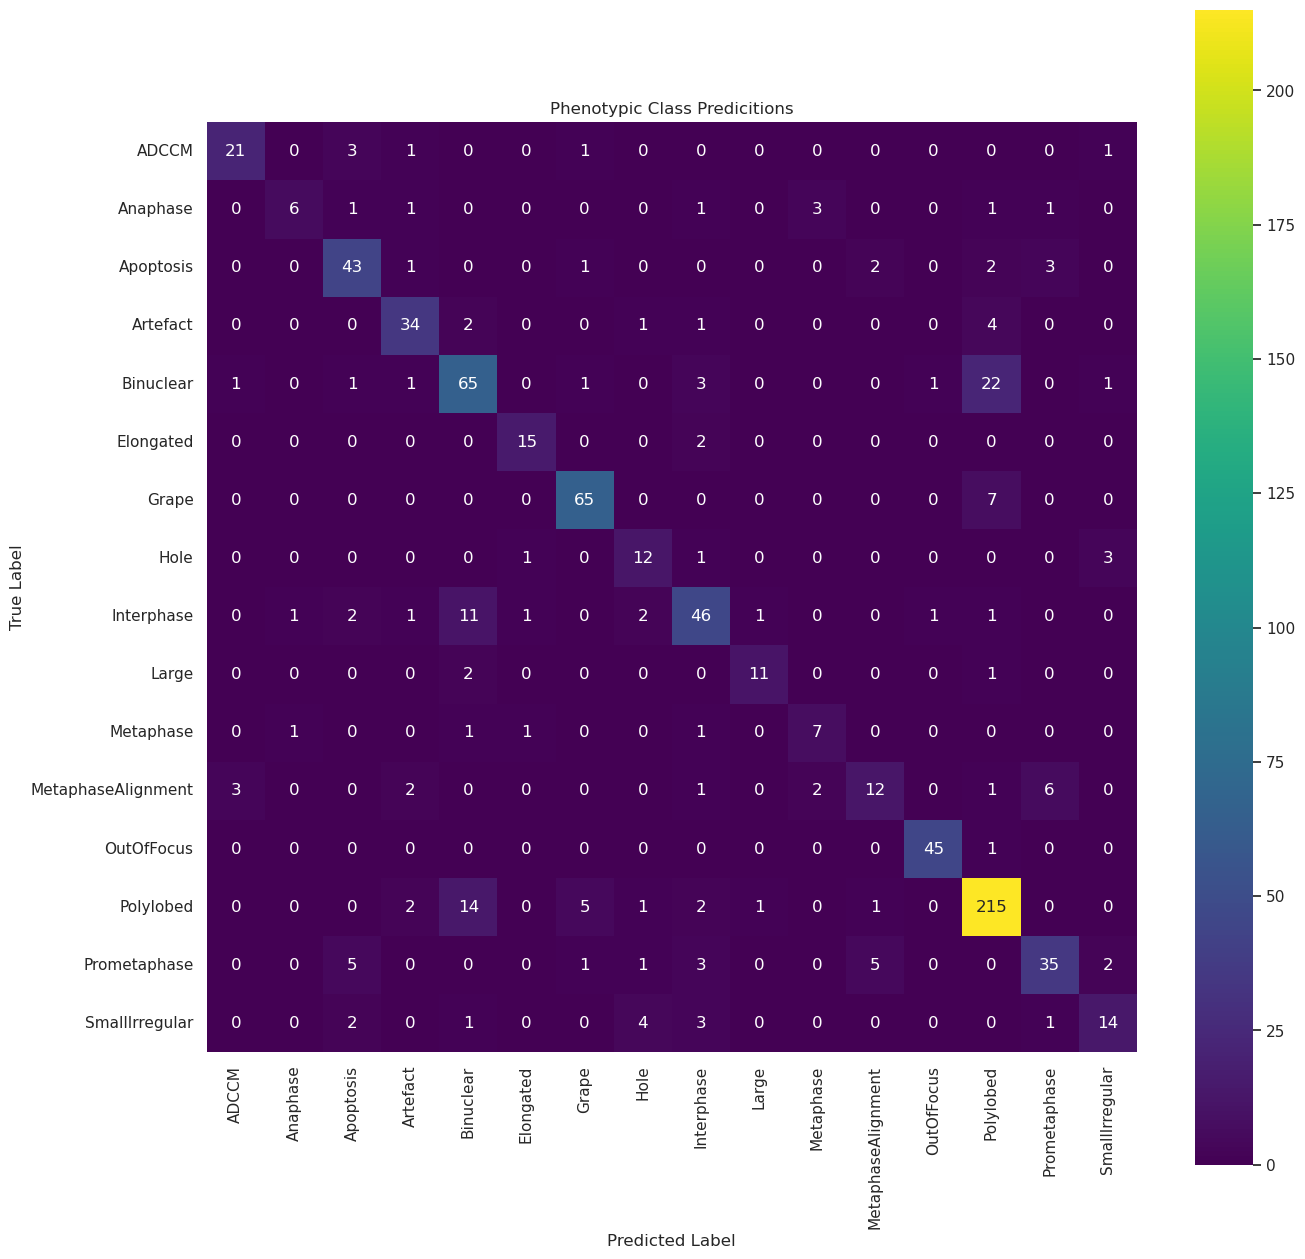

In [8]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

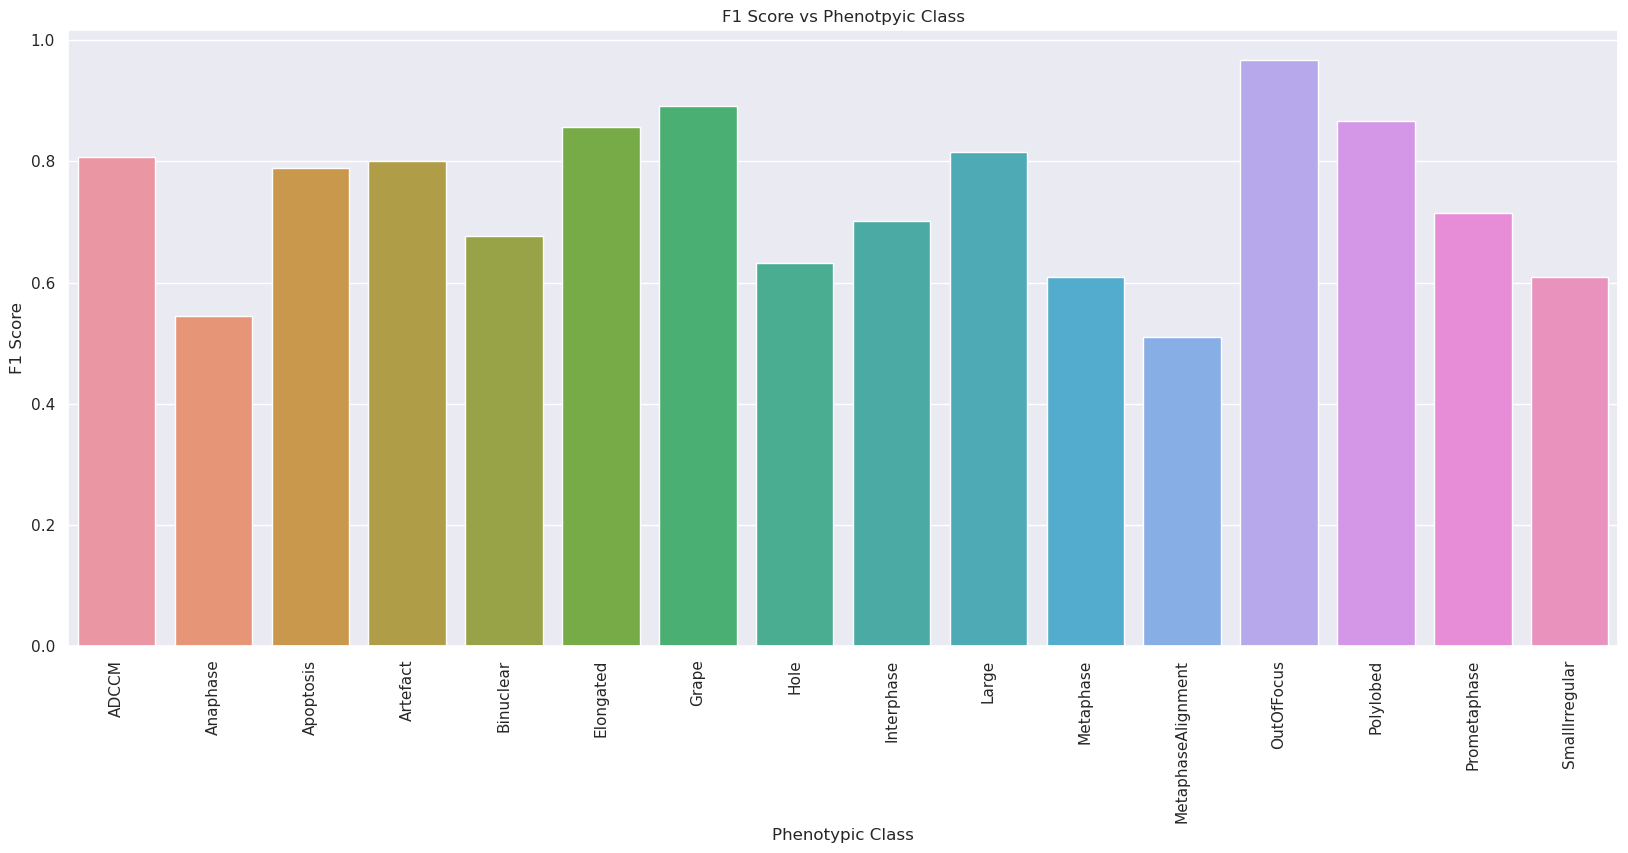

In [9]:
evaluate_model_score(log_reg_model, testing_data)

### Save trained model predicitions

In [10]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred"]
predictions.to_csv(f"{results_dir}/model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [11]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

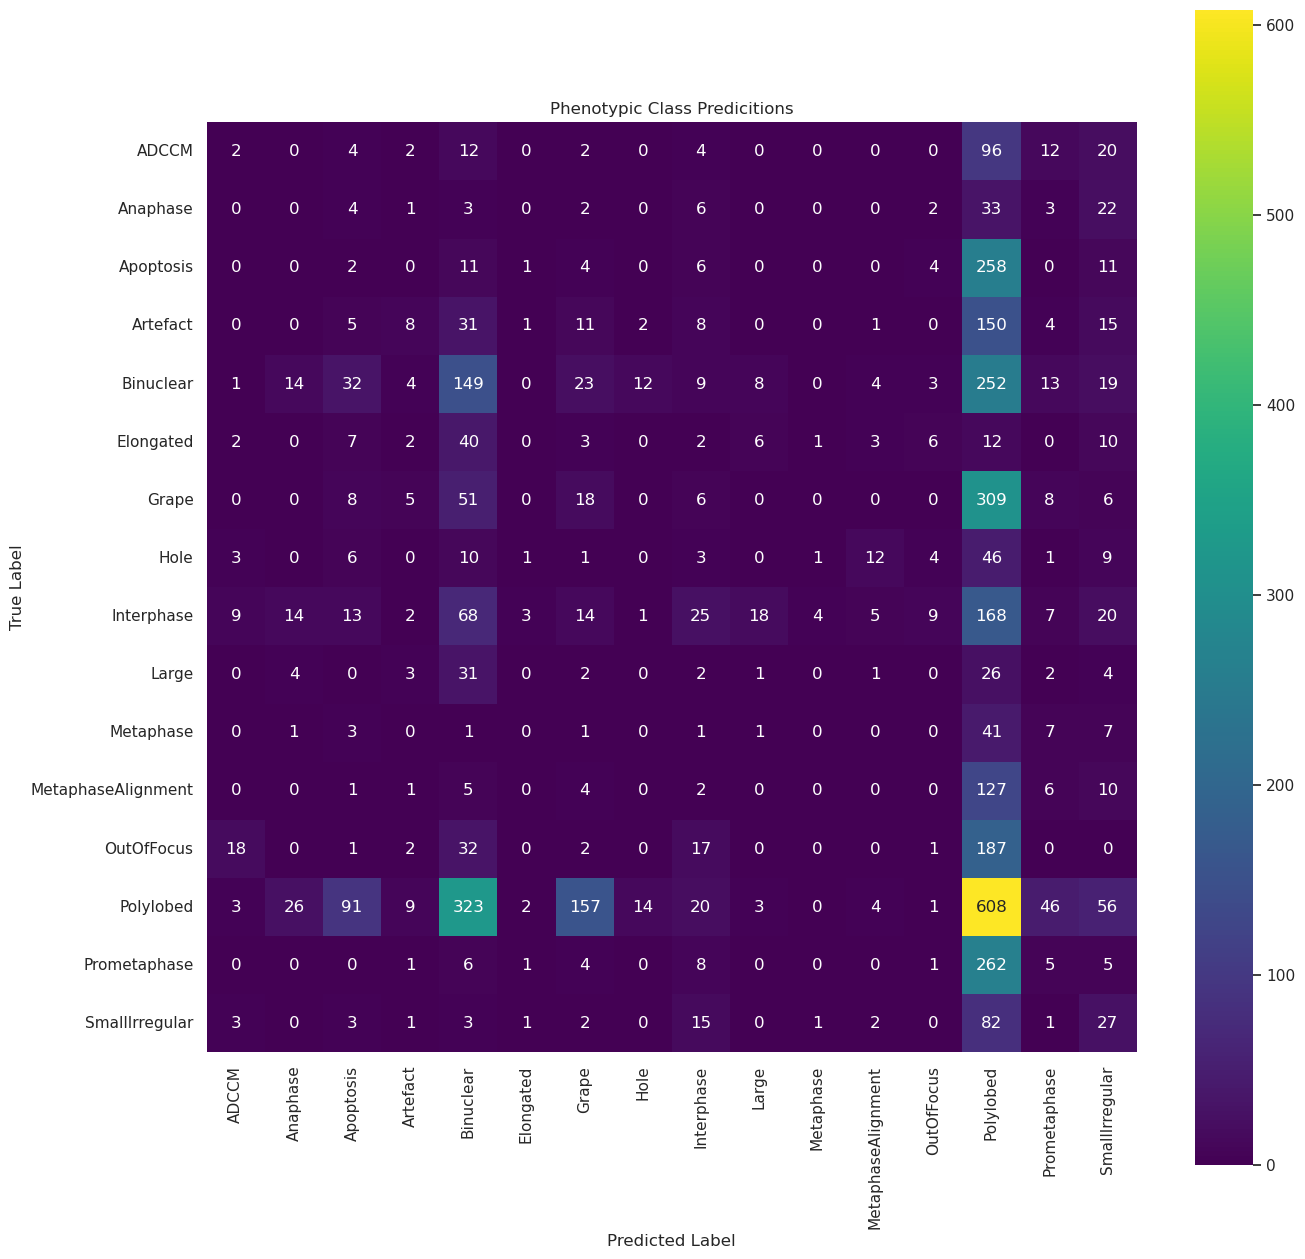

In [12]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

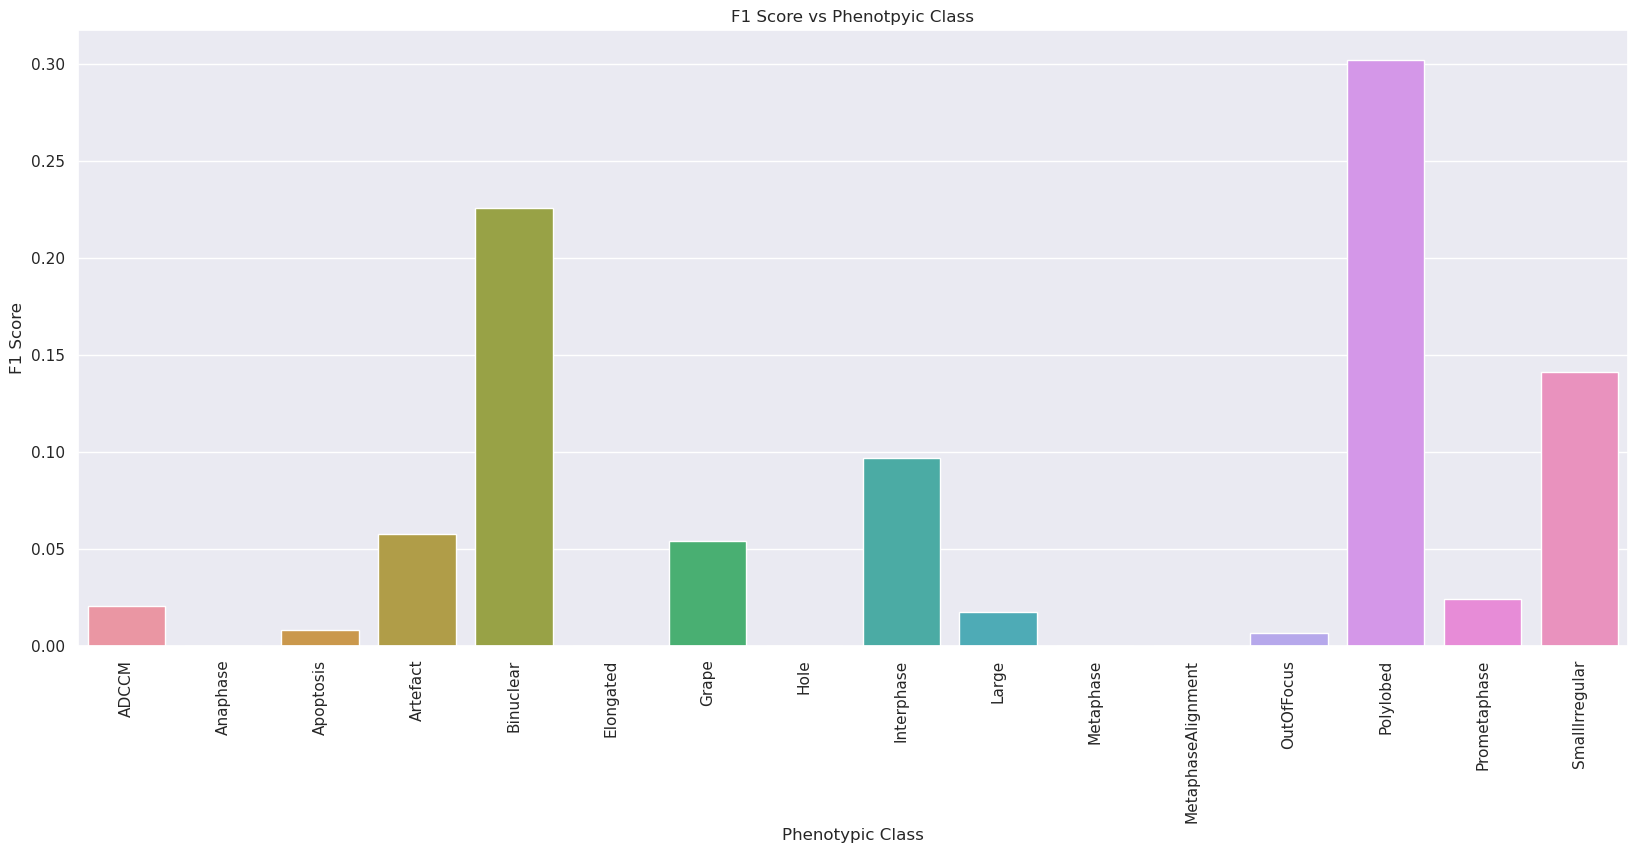

In [13]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

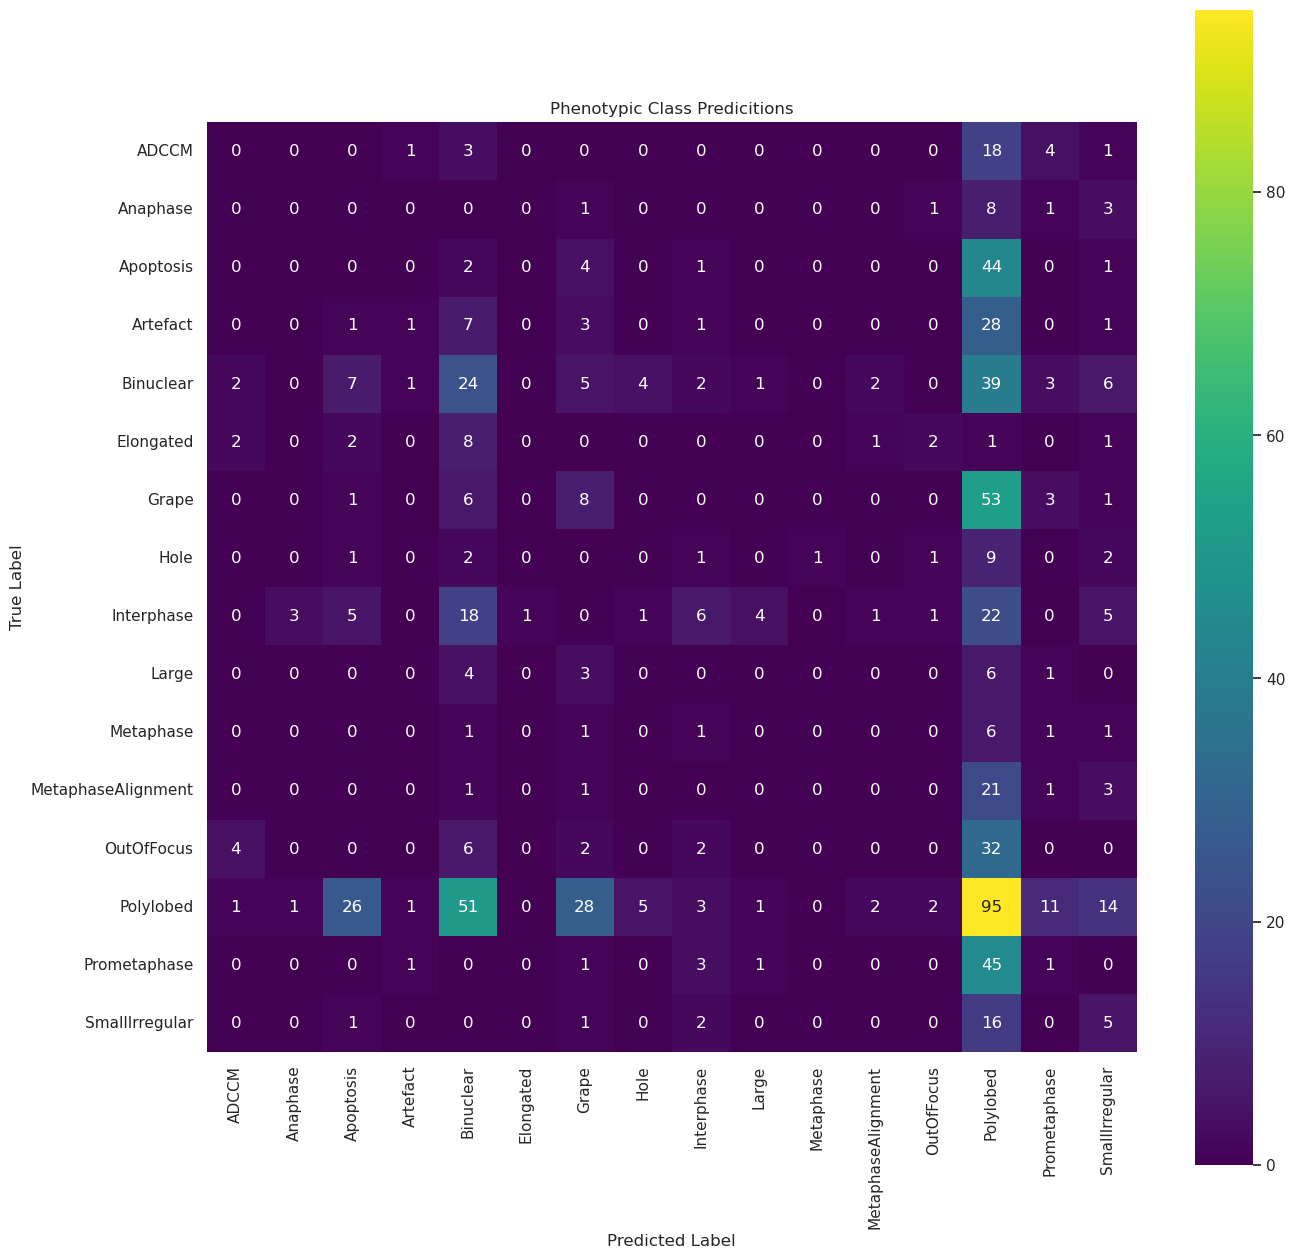

In [14]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

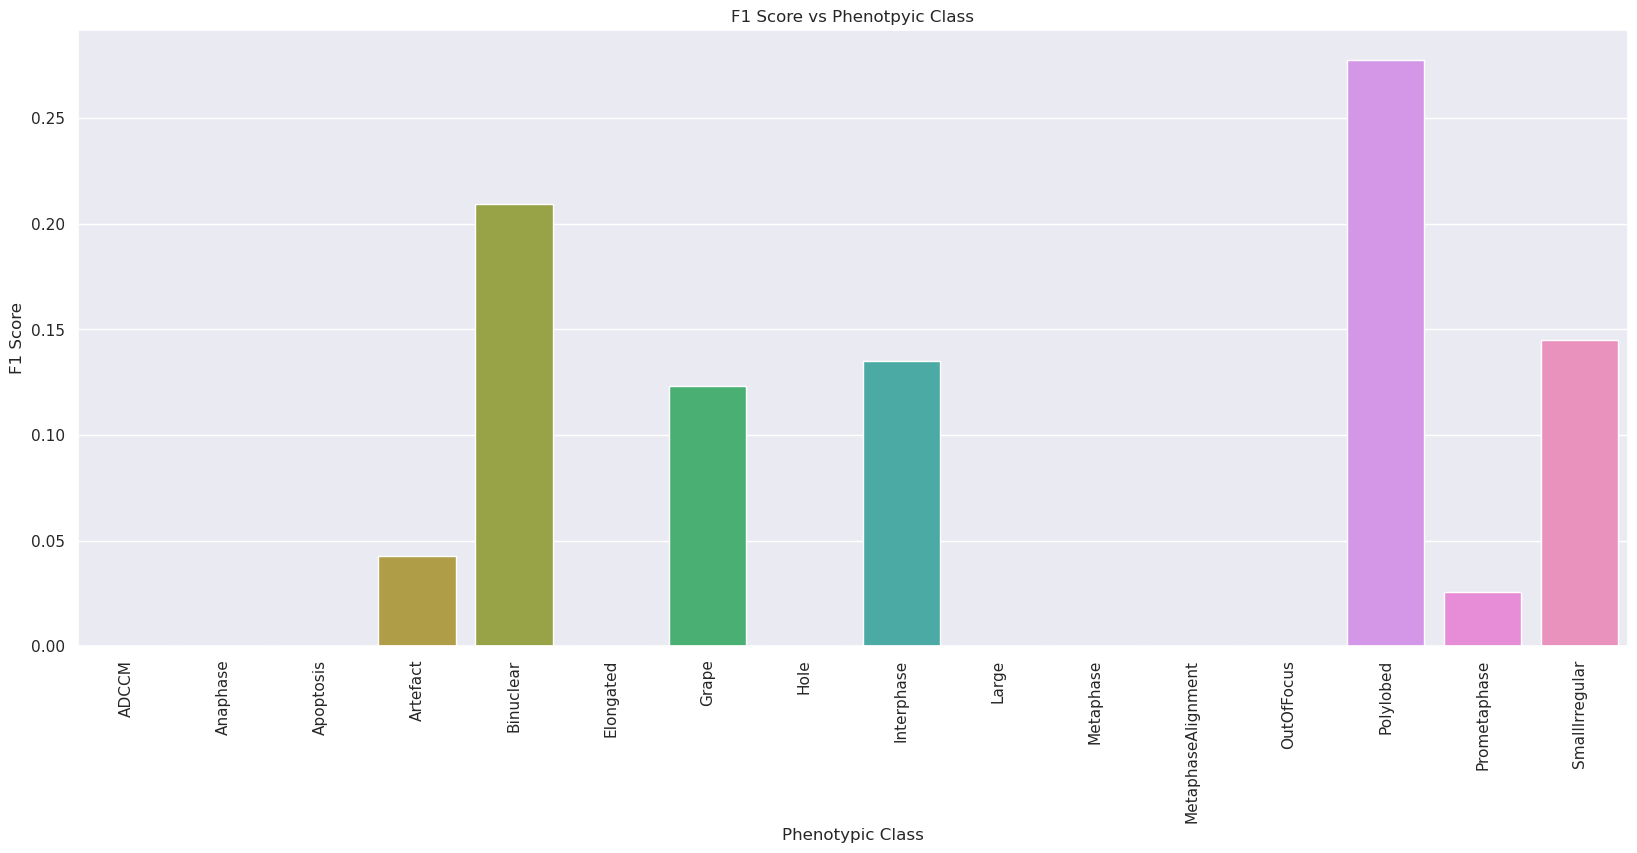

In [15]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Save trained model predicitions

In [16]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred"]
predictions.to_csv(f"{results_dir}/shuffled_baseline_model_predictions.tsv", sep="\t")